# Clustering for dataset exploration
---

In this notebook, we will learn how to discover clusters in a dataset. We will also be clustering different species by clustering their measurements and types of wines based on chemical and visual properties.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

## Unsupervised Learning

Unsupervised learning is a technique to find patterns in data. For example, **clustering** (groupping) customers by their purchases. Compressing the data using purchase patterns (**dimension reduction**).

While supervised learning finds patterns for a prediction task. For example, classify tumors as benign or cancerous, here, the pattern discovery is *supervised* so that patterns are useful for predicting the type of tumor. In contrast, the unsupervised learning is just pure pattern discovery unguided by a prediction task.

## k-means Clustering

The k-means algorithm finds clusters of samples. It is based on initializing centroids (means) with random means, then, updating these means iteratively with the mean of the samples that are assigned to that centroids because it's closer to those samples than the other centroids. The algorithmrepeats the clusters updating We need to specify the number of centroids.

We can use that algorithm from the `KMeans` class in `sklearn.cluster`. We will use the iris dataset in the `sklearn.datasets` module.

In [32]:
iris = datasets.load_iris()

In [33]:
iris.data.shape

(150, 4)

The iris dataset is 4d data. Dimension of the data is the number of features.

In [34]:
from sklearn.cluster import KMeans

kmeans_iris = KMeans(n_clusters=3) # we choose 3 because we know the target has 3 classes.
kmeans_iris.fit(iris.data)

KMeans(n_clusters=3)

After fitting the data to the kmeans model. We can apply the `predict` method on the same data. This will return the cluster assigned to each sample in the data.

In [35]:
labels = kmeans_iris.predict(iris.data)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

We can also look at what are the final centroids of clusters.

In [36]:
kmeans_iris.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

We can look at some scatter plots to see what are the groups (clusters) of the data given their labels. For example, scatter plot between sepal length and petal lenght.

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0, 0.5, 'Petal length (cm)')

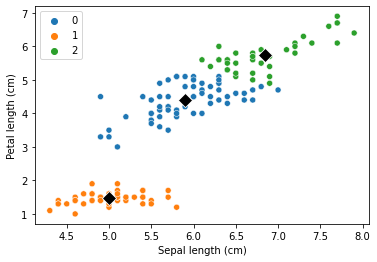

In [38]:
sns.scatterplot(
    x = iris.data[:, 0],
    y = iris.data[:, 2],
    hue = labels,
    palette = "tab10"
)

sns.scatterplot(
    x = kmeans_iris.cluster_centers_[:, 0],
    y = kmeans_iris.cluster_centers_[:, 2],
    color = "black",
    marker = "D",
    s = 100,
)

plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")

## Evaluating a clustering

We can use **cross tabulation** to evaluate the clustering. In a cross tabulation, we assign the clustered labels as the rows and the actual labels as the columns. Then at each row and column intersection, a number will be shown that indicates the number that has both clustered and actual label. We can cosntruct this table using `pandas.crosstab`

In [39]:
clustering_df = pd.DataFrame({"labels": labels, "species": [iris.target_names[target] for target in iris.target]})
clustering_df.head()

,labels,species
0,1,setosa
1,1,setosa
2,1,setosa
3,1,setosa
4,1,setosa


In [40]:
ct = pd.crosstab(clustering_df.labels, clustering_df.species)
ct

species,setosa,versicolor,virginica
labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


We can see that cluster 0 is for versicolor, cluster 1 for setosa, and cluster 2 for virginca.

However, We can tell the quality of the clustering if we know our targets. But what if there were no information about the target classes ?

We can measure the clustering quality using only the samples and their cluster labels. A good clustering has tight cluster in which they are groupped into small area and not distributed in all the space.

We can observe this using **inertia** which can be described as the distance from each sample to the centroid of its cluster. The lower, the better. When fitting the `KMeans` model, we can access its inertia using the `inertia_` data member.

In [41]:
kmeans_iris.inertia_

78.851441426146

Now, we can tune the number of clusters and use inertia as our metric.

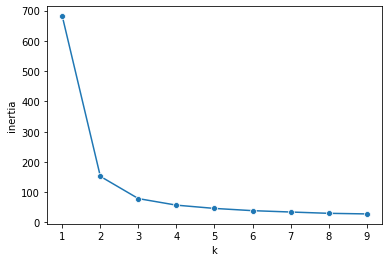

In [49]:
kmeans_tuned = KMeans()
inertias = []

for k in range(1, 10):
    kmeans_tuned.n_clusters = k
    kmeans_tuned.fit(iris.data)
    inertias.append(kmeans_tuned.inertia_)

sns.lineplot(x = range(1, 10), y = inertias, marker="o")
plt.xlabel("k")
plt.ylabel("inertia");

>How to choose the number of clusters from the above plot ?

A good clustering has tight clusters with low inertia but not too many clusters. A rule of thumb is to choose an **elbow**. Elbow is a point where the inertia begin to decrease more slowly. From the graph, 3 is a good selection for k.

## Transforming features for better clustering

In [50]:
wines_df = pd.read_csv("assets/data/wines.csv")
wines_df.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [52]:
wines_df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [53]:
wines_df.class_name.unique()

array(['Barolo', 'Grignolino', 'Barbera'], dtype=object)

We have a dataset about wine that has 3 varieties; Barolo, Grignolino and Barbera of 178 samples that include checmical composition like alcohol content and visual properties like color intensity. Let's try to fit a `KMeans` model to the data.

In [54]:
X = wines_df.drop(columns=["class_label", "class_name"]).values

In [55]:
wines_kmeans = KMeans(n_clusters=3)
labels = wines_kmeans.fit_predict(X) # fit_predict applies fit then applies predict and return the labels.

Now, we can create a cross table between the class_name column and the labels to evaluate the clustering.

In [61]:
wines_clustering_df = pd.DataFrame({"labels": labels, "class": wines_df.class_name})
wines_clustering_df.head()

,labels,class
0,1,Barolo
1,1,Barolo
2,1,Barolo
3,1,Barolo
4,2,Barolo


In [65]:
pd.crosstab(wines_clustering_df["labels"], wines_clustering_df["class"])

class,Barbera,Barolo,Grignolino
labels,,,
0,19,0,50
1,0,46,1
2,29,13,20


mmmm, not the tight clusters we wished we got. But, there is a reason for these bad results. The features have very different ranges and variances.

In [68]:
wines_df.var(numeric_only=True)

class_label                 0.600679
alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64

In kmeans, and any estimator uses distances in their calculations, the feature variance represent its influence. And to avoid variance issues, we should transform and scale the features to be in similar ranges. We should use `StandardScaler` for the features.

(-1680.0, 1680.0)

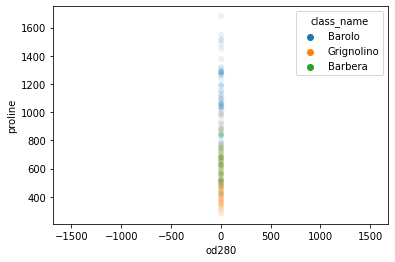

In [73]:
sns.scatterplot(
    data = wines_df,
    x = "od280",
    y = "proline",
    hue = "class_name",
    alpha = 0.1
)

plt.xlim(-wines_df.proline.max(), wines_df.proline.max())

When scaling the data,

In [74]:
from sklearn.preprocessing import StandardScaler

X_sclaed = StandardScaler().fit_transform(X)

<AxesSubplot:>

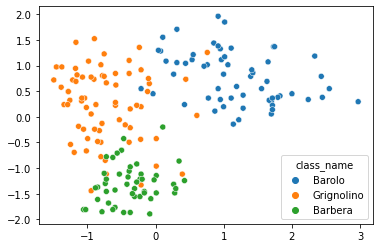

In [77]:
sns.scatterplot(
    x = X_sclaed[:, -1],
    y = X_sclaed[:, -2],
    hue = wines_df.class_name,
)

Much closer data variances. We can build a pipeline stacking the scaling and clustering steps into one model.

In [78]:
from sklearn.pipeline import Pipeline

steps = [
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=3))
]

pipeline = Pipeline(steps)

pipeline.fit(X)

labels = pipeline.predict(X)

In [79]:
wines_clustering_df = pd.DataFrame({"labels": labels, "class": wines_df.class_name})
wines_clustering_df.head()

,labels,class
0,1,Barolo
1,1,Barolo
2,1,Barolo
3,1,Barolo
4,1,Barolo


In [80]:
pd.crosstab(wines_clustering_df["labels"], wines_clustering_df["class"])

class,Barbera,Barolo,Grignolino
labels,,,
0,0,0,65
1,0,59,3
2,48,0,3


much better results.